# Interactive Session: Matlab code for Rescorla Wagner Model

Adapted code from paper:
Wilson RC, Collins AG.
Ten simple rules for the computational modeling of behavioral data. 
Elife. 2019 Nov 26;8:e49547. doi: 10.7554/eLife.49547. 
Download from git: https://github.com/AnneCollins/TenSimpleRulesModeling.git

Original script name: Figure2_simulations

## Challenge 1: Define the experiment.
First we define how the experiment works. Here, we will simulate a two-armed bandit experiment. In the two-armed bandit task participants repeatedly choose between two stimuli. Each stimulus has a certain <b>reward probability</b>. Participants complete several <b>trials </b>and their goal is to maximize <b>rewards</b>.

### Step 1: Define the number of trials and reward probabilities.
First, we have to decide on the number of trials and the reward probabilities for each stimulus. Store the number of trials in a variable `T` and store the reward probabilities (one for each of the two stimuli) in variable `mu`.
> Note: You can define these parameters however you want. In the Collins paper there were 100 trials and the reward probabilities were .2 for one stimulus and .8 for the other.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [1]:
% Setup some initial parameters
T   = 100;         % number of trials
mu  = [0.2 0.8];    % mean reward of bandits

### Step 2: Determine how the reward is chosen.
The reward code allocates reward stochastically based on reward probabilities. This line of code uses an action and the reward probabilities and returns either a reward of 1 or no reward (0).

It achieves this by generating a random number from a uniform distribution ranging from 0 and 1 (in matlab you can do this using `rand`).

Next, it compares the reward probability associated with the chosen action `a` on trial `t`: `mu(a(t))` to that number. If it is lower or equal `<=` to the reward probability it returns 1 (reward) otherwise it returns 0 (no reward).

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [4]:
r(t) = rand < mu(a(t));
% to test, set t = 1 and a = 1 (or 2)

## Challenge 2: Set up your first behavioral model (Rescorla-Wagner).
The Rescorla-Wagner model consists of a softmax choice rule and a Q-learning update algorithm. Initially, the model does not know which action is the best choice, so both actions should have the same Q-value.

### Step 1: Initialize your Q-values
In this step you define the initial Q-values. Store them in a variable Q.

> Note: We will need to save a record of these Q-values for plotting. To allow for this you'll have to place your Q-values into a variable (array, structure, etc.) to save. The original matlab code provided does not save these variables through each iteration of the loop, so Q is set intially and overwritten on each trial. You can set this up multiple ways depending on preference.

Initial Q values set by Collins & Wilson were 0.5.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [38]:
Q = [0.5 0.5];
Qt = nan(T,2); % setup 2 cols of nans for the length of trials, T

### Step 2: Implement the softmax function.
The softmax function determines choice probabilities based on Q-values using the following formula:

$p_a = \dfrac{exp(Q_{at}*beta)} {\Sigma{exp(Q_{at}*beta)}}$

As you can see, this function also introduces our first participant parameter the <b>inverse temperature (beta)</b>. The larger beta the more deterministic (less random) a person's choices are.

> Bonus Question: What else does this function do, next to introducing beta?

#### 2.2 Define beta
First define beta and store it in the variable `beta`. Here you can pick any positive value (we chose 5).

> Bonus Question: Why does beta need to be positive?

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [7]:
beta = 5; % inverse temperature

#### 2.3 Implement the softmax function.
You can do this in matlab by writing out a line of code for the function and including the variables (hint: we've gone through above) that go into it.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
p(t,:) = exp(beta*Q) / sum(exp(beta*Q));

### Step 3: Write a decision function.
This function uses choice probabilities as an input and returns a concrete choice as an output. It achieves this by first generating a random number from a uniform distribution ranging from 0 and 1 (in matlab you can do this using `rand`).

Next, it compares the first choice probability to this number.  If it is lower or equal to the choice probability the chosen action is 1, else the chosen action is 2.

> Note: You can make separate functions using Jupyter’s “%%file” magic to create the choose.m function in this directory


> Note: There are multiple ways to write this function. Another example is the `choose.m` function from the Collins & Wilson paper github repository.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [4]:
%%file choose.m
  % Jupyter’s “%%file” magic creates the choose.m function (see output)
function a = choose(p)
    % Input:
            % <p> choice probabilities for opts, e.g. p = [b 1-b]
    % Output:
            % <a> option chosen, 1 or 2
            
    %a = max(find([-eps cumsum(p)] < rand)); % this is how Collins & Wilson did it in matlab scripts
    
    if rand <= p(1)
        a = 1;
    else
        a = 2;
    end
    
end

Created file '/Users/tmckim/Documents/GitHub/notebooks/choose.m'.


### Step 4: Write the update function
The update function updates Q-values based on the reward, according to this formula:
$Q_{a,t+1} = Q_{a,t} + \alpha (r - Q_{a,t})$

As you can see, this function introduces another participant parameter: the <b>learning rate (alpha)</b>.

#### 4.1 Define alpha
Pick a value between 0 and 1 (we chose 0.1) and store it as `alpha`.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [6]:
alpha = 0.1;

#### 4.2: Create the update function
Write lines of code to first calculate the prediction error and then update Q.

>Hint: 

>PE = reward - expected value (Q)

>Updated Q = expected value (Q) + learning rate* PE

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
% calculate delta/PE 
delta(t) = r(t) - Q(a(t)); % reward minus the value of the trial

% Update Q
Q(a(t)) = Q(a(t)) + alpha * delta(t);

### Step 5: Putting it all together
Congratulations, you created all the components of your simulation function.  Now let's put them all together and simulate some data.  The simulation function (call it `simulate_M3RescorlaWagner_v1`) takes the experiment parameters, `mu` and `T`, as well as the participant parameters `alpha` and `beta` as inputs.

> Note: Don't forget to initialize the q-values as we did in step 2.1.

In each trial, we simulate an action chosen by the participant, allocate a reward, and update the participant's q-values accordingly.


As outputs it returns the variables (i.e., vectors) `actions`, `rewards`, `deltas`, `Qs`, and `probabilities` for each trial.

In [8]:
%%file simulate_M3RescorlaWagner_v1.m
  % Jupyter’s “%%file” magic creates the function (see output)
function [a, r, delta, Qt, p] = simulate_M3RescorlaWagner_v1(T,mu,alpha,beta)

Q = [0.5 0.5]; % initial values

% initialize these variables to store values across trials
 Qt  = nan(T, 2);
 p  = nan(T, 2);
 
 
for t = 1:T
    
    % added trial indexing to track these values across trials
    Qt(t,:) = Q;

    % compute choice probabilities
    p(t,:) = exp(beta*Q) / sum(exp(beta*Q)); % softmax function 
    
    % make choice according to choice probababilities
    a(t) = choose(p(t,:)); % code is from the 'choose' function
    
    % generate reward based on choice
    r(t) = rand < mu(a(t));
    
    % update values (added trial indexing to track across trials)
    delta(t) = r(t) - Q(a(t)); 
    
    % Q(a(t)) indexes the value for the option chosen (1 or 2)
    Q(a(t)) = Q(a(t)) + alpha * delta(t);
    

end

Created file '/Users/tmckim/Documents/GitHub/notebooks/simulate_M3RescorlaWagner_v1.m'.


## Challenge 3: Explore the parameters
A simple plotting function is written below that will use the `simulate_M3RescorlaWagner_v1` function created above to simulate an experiment based on the parameters and plots its outputs in a figure. Below, we will go through some parameter combinations and explore their effects.

In [39]:
%%file plotRW.m
  % Jupyter’s “%%file” magic creates the plotRW.m function (see output)
function plotRW(T,mu,alpha,beta)
%plot inline
    [a, r, delta, Qt, p] = simulate_M3RescorlaWagner_v1(T,mu,alpha,beta);
    plot(Qt(:,1), '-b'); % bad option in blue- plot col 1 
    hold on
    plot(Qt(:,2), '-r'); % good option in red- plot col 2
    plot(a - 1, 'o'); % convert to 0's and 1's: dots (1 = B and 0 = A)
    plot(delta, '-k');
    ylim([-1.1, 1.1]);
    xlim([0, T]);
    xlabel('trials');
    ylabel('Q-values');
    legend('A','B','Choice', 'PE');
end

Created file '/Users/tmckim/Documents/GitHub/notebooks/plotRW.m'.


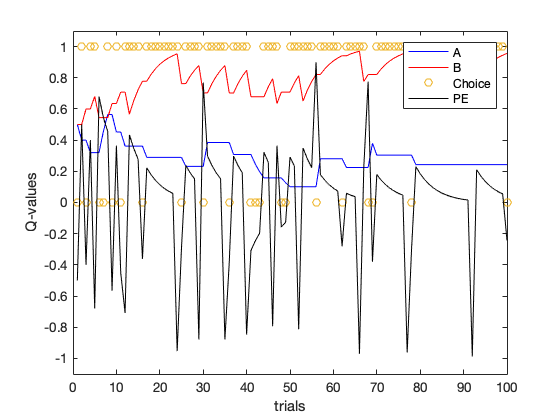

In [23]:
T = 100; % number of trials
mu = [.2,.8]; % reward probabilities
alpha = .2; % learning rate
beta = 4; % inverse temperature
plotRW(T,mu,alpha,beta)

> Reducing the learning rate (participant does not manage to learn probabilities)

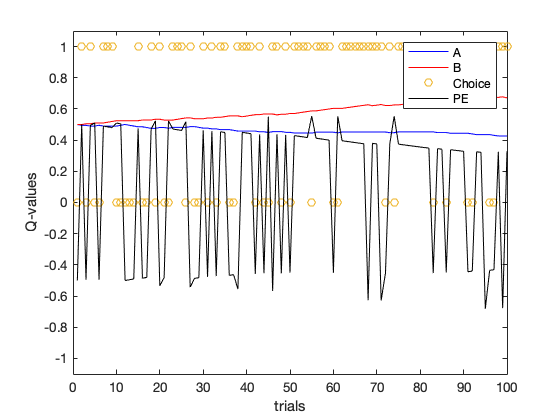

In [24]:
T = 100; % number of trials
mu = [.2,.8]; % reward probabilities
alpha = .01; % learning rate
beta = 4; % inverse temperature
plotRW(T,mu,alpha,beta)

Add more trials:

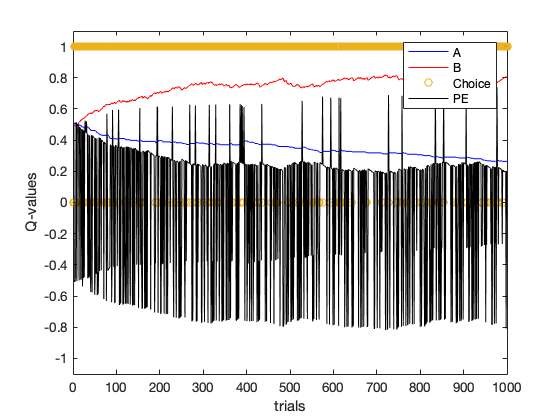

In [25]:
T = 1000; % number of trials
mu = [.2,.8]; % reward probabilities
alpha = .01; % learning rate
beta = 4; % inverse temperature
plotRW(T,mu,alpha,beta)

An extreme beta value makes participants stop exploring:

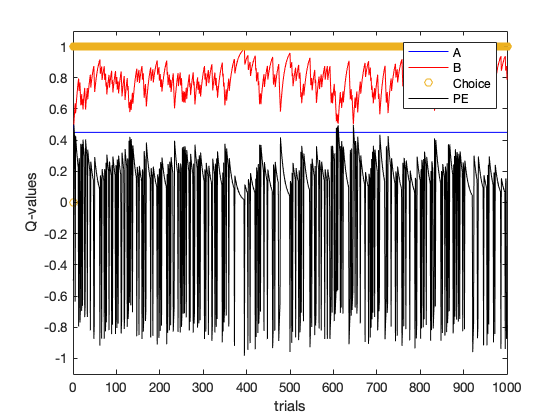

In [26]:
T = 1000; % number of trials
mu = [.2,.8]; % reward probabilities
alpha = .1; % learning rate
beta = 1000; % inverse temperature
plotRW(T,mu,alpha,beta)

> If beta is very low, participants still learn, but they don't use that knowledge (something that we cannot see in this plot yet).

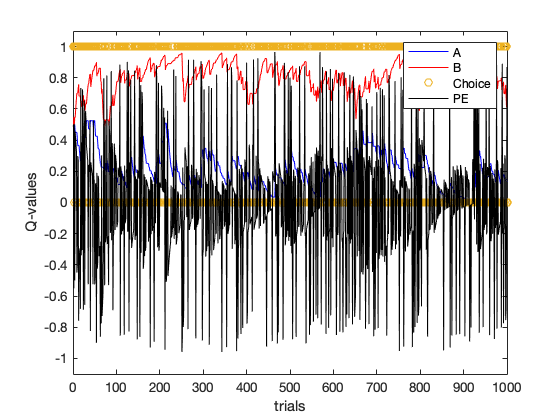

In [27]:
T = 1000; % number of trials
mu = [.2,.8]; % reward probabilities
alpha = .1; % learning rate
beta = 0.0000000001; % inverse temperature
plotRW(T,mu,alpha,beta)

To instead plot probabilities, we have that information easily accessible:

In [40]:
%%file plotRW_prob.m
  % Jupyter’s “%%file” magic creates the plotRW.m function (see output)
function plotRW_prob(T,mu,alpha,beta)
%plot inline
    [a, r, delta, Qt, p] = simulate_M3RescorlaWagner_v1(T,mu,alpha,beta);
    plot(p(:,1), '-b'); % bad option in blue- plot col 1 
    hold on
    plot(p(:,2), '-r'); % good option in red- plot col 2
    plot(a - 1, 'o'); % convert to 0's and 1's: dots (1 = B and 0 = A)
    ylim([-0.1, 1.1]);
    xlim([0, T]);
    xlabel('trials');
    ylabel('Prob');
    legend('PA','PB','Choice');
end

Created file '/Users/tmckim/Documents/GitHub/notebooks/plotRW_prob.m'.


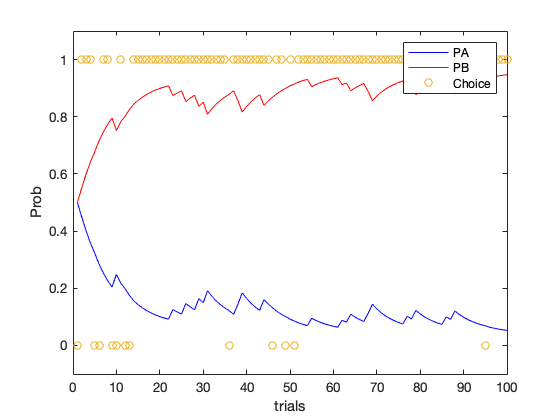

In [42]:
T = 100; % number of trials
mu = [.2,.8]; % reward probabilities
alpha = .1; % learning rate
beta = 4; % inverse temperature
plotRW_prob(T,mu,alpha,beta)

## Challenge 4: Choice Kernel
The only difference between choice kernel and Rescorla-Wagner is that the softmax function uses `CK` values instead of `Q-values` and the update function is indendent of rewards.  Therefore, we need to change the variables accordingly.

### Step 1: Write a new update function
The formula of the update function looks like this:

$CK_{a,t+1} = CK_{a,t} + \alpha * 1$

Before the choice kernel is updated, both choice kernels decay with the inverse of the learning rate:

$CK_{t+1} = CK_{t} * (1 - \alpha) $


> Note: If you're confused by the multiplication with one: This is only for comparability with the Rescorla-Wagner.

<i> Enter your code here: </i>

<i>Check the solution below:</i>

In [ ]:
% update choice kernel
CK = (1-alpha_c) * CK;
CK(a(t)) = CK(a(t)) + alpha_c * 1;

### Step 2: Putting it all together.
Now make a `simulate_M4ChoiceKernel_v1` function similar to the Rescorla Wagner model but with our newly updated code to use CK for choice kernel instead of Qs.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [60]:
%%file simulate_M4ChoiceKernel_v1.m
  % Jupyter’s “%%file” magic creates the function (see output)
function [a, r, CKt, p] = simulate_M4ChoiceKernel_v1(T,mu,alpha_c,beta_c)

CK = [0 0]; % initial values

% initialize these variables to store values across trials
 CKt  = nan(T, 2);
 p  = nan(T, 2);
 
 
for t = 1:T
    
    % added trial indexing to track these values across trials
    CKt(t,:) = CK;

    % compute choice probabilities
    p(t,:) = exp(beta_c*CK) / sum(exp(beta_c*CK)); % softmax function 
    
    % make choice according to choice probababilities
    a(t) = choose(p(t,:)); % code is from the 'choose' function
    
    % generate reward based on choice
    r(t) = rand < mu(a(t));
    
    % update choice kernel
    CK = (1-alpha_c) * CK;
    CK(a(t)) = CK(a(t)) + alpha_c * 1;
    

end

Created file '/Users/tmckim/Documents/GitHub/notebooks/simulate_M4ChoiceKernel_v1.m'.


> Note that choice_kernel decays with the inverted alpha in each trial `CK = (1 - alpha_c) * CK`

## Challenge 5: Explore the parameters of your choice kernel simulations

In [61]:
%%file plotCK.m
  % Jupyter’s “%%file” magic creates the plotRW.m function (see output)
function plotCK(T,mu,alpha_c,beta_c)
%plot inline
    [a, r, CKt, p] = simulate_M4ChoiceKernel_v1(T,mu,alpha_c,beta_c);
    plot(CKt(:,1), '-b'); % bad option in blue- plot col 1 
    hold on
    plot(CKt(:,2), '-r'); % good option in red- plot col 2
    plot(a - 1, 'o'); % convert to 0's and 1's: dots (1 = B and 0 = A)
    ylim([-0.1, 1.1]);
    xlim([0, T]);
    xlabel('trials');
    ylabel('CK-values');
    legend('A','B','Choice');
end

Created file '/Users/tmckim/Documents/GitHub/notebooks/plotCK.m'.


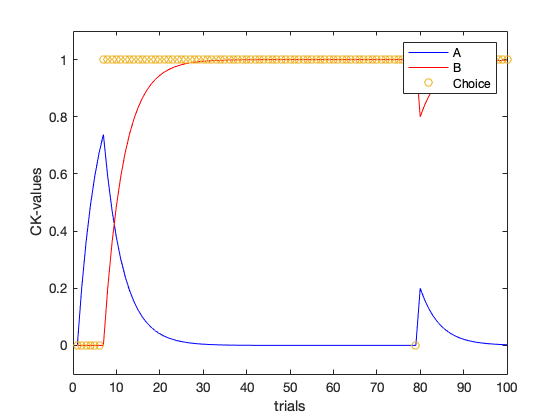

In [62]:
T = 100; % number of trials
mu = [.2,.8]; % reward probabilities
alpha_c = .2; %learning rate
beta_c = 4; % inverse temperature
plotCK(T, mu, alpha_c, beta_c)

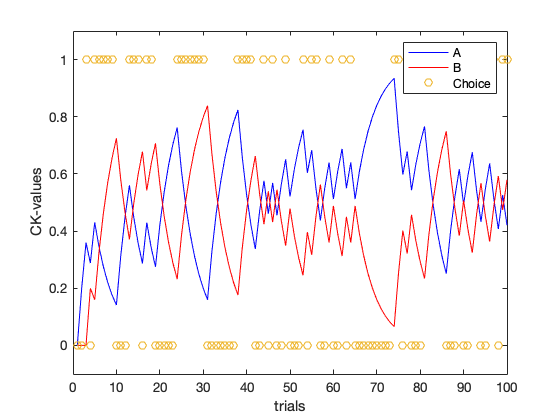

In [63]:
T = 100; % number of trials
mu = [.2,.8]; % reward probabilities
alpha_c = .2; %learning rate
beta_c = 0.004; % inverse temperature
plotCK(T, mu, alpha_c, beta_c)

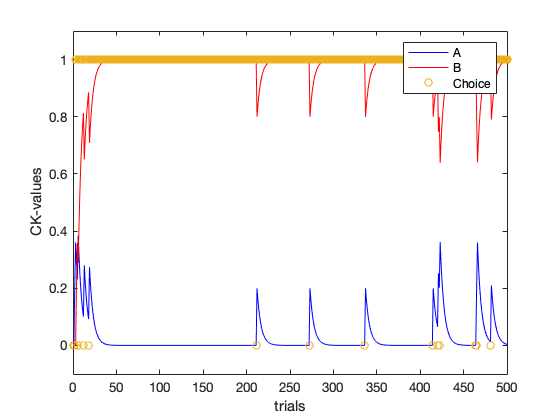

In [64]:
T = 500; % number of trials
mu = [.2,.8]; % reward probabilities
alpha_c = .2; %learning rate
beta_c = 4; % inverse temperature
plotCK(T, mu, alpha_c, beta_c)

> With a reasonably high beta one of the options should always move towards 1.

Other resources for reinforcement learning modeling and matlab code examples:
http://www.hannekedenouden.ruhosting.nl/RLtutorial/Instructions.html

https://github.com/DevComPsy/2021FluxCompModellingWorkshop.git